# Business problem

In [ ]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Load Dataset

In [ ]:
path = r"https://drive.google.com/uc?id=1oXumwgCs7bTJIJxeM82SeE6J0bJEQnaU"
df = pd.read_csv(path,on_bad_lines='skip')  # Skip bad rows

In [ ]:
df.head()


,study_hours,student_marks
0,6.83,78.50
1,6.56,76.74
2,NaN,78.68
3,5.67,71.82
4,8.67,84.19


In [ ]:
df.tail()

,study_hours,student_marks
195,7.53,81.67
196,8.56,84.68
197,8.94,86.75
198,6.60,78.05
199,8.35,83.50


In [ ]:
df.shape

(200, 2)

# Discover and visualize the data to gain insights

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   study_hours    195 non-null    float64
 1   student_marks  200 non-null    float64
dtypes: float64(2)
memory usage: 3.3 KB


In [ ]:
df.describe()

,study_hours,student_marks
count,195.000000,200.00000
mean,6.995949,77.93375
std,1.253060,4.92570
min,5.010000,68.57000
25%,5.775000,73.38500
50%,7.120000,77.71000
75%,8.085000,82.32000
max,8.990000,86.99000


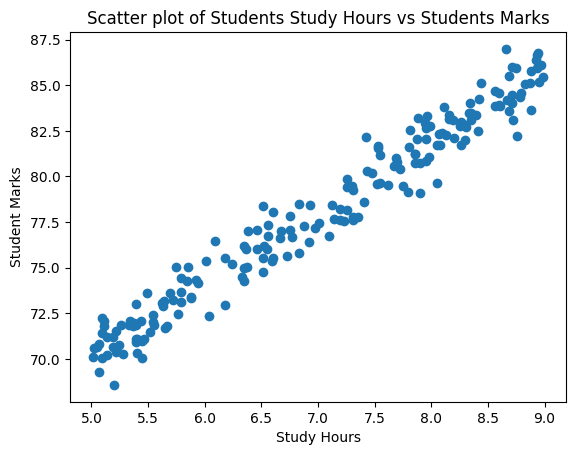

In [ ]:
plt.scatter(x=df.study_hours, y= df.student_marks)
plt.xlabel("Study Hours")
plt.ylabel("Student Marks")
plt.title("Scatter plot of Students Study Hours vs Students Marks")
plt.show()

# Prepare the data for Machine Learning Algorithms

In [ ]:
# Data Cleaning

In [ ]:
df.isnull().sum()

,0
study_hours,5
student_marks,0


In [ ]:
df.mean()

,0
study_hours,6.995949
student_marks,77.933750


In [ ]:
df2= df.fillna(df.mean())

In [ ]:
df2.isnull().sum()

,0
study_hours,0
student_marks,0


In [ ]:
df2.head()

,study_hours,student_marks
0,6.830000,78.50
1,6.560000,76.74
2,6.995949,78.68
3,5.670000,71.82
4,8.670000,84.19


In [ ]:
# Split dataset

In [ ]:
X= df2.drop("student_marks",axis="columns")
y= df2.drop("study_hours",axis="columns")
print("shape of X= ", X.shape)
print("shape of y= ", y.shape)

shape of X=  (200, 1)
shape of y=  (200, 1)


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Step 1: Load data
data = pd.read_csv("https://drive.google.com/uc?id=1oXumwgCs7bTJIJxeM82SeE6J0bJEQnaU")  # <-- यह file path सही रखें

# Step 2: Check and drop rows with NaN values
print("Missing values before drop:\n", data.isnull().sum())
data.dropna(inplace=True)

# Step 3: Redefine X and y
X = data[['study_hours']]
y = data[['student_marks']]

# Step 4: Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=51)

# Step 5: Print shapes
print("shape of X_train= ", X_train.shape)
print("shape of y_train= ", y_train.shape)
print("shape of X_test= ", X_test.shape)
print("shape of y_test= ", y_test.shape)

Missing values before drop:
 study_hours      5
student_marks    0
dtype: int64
shape of X_train=  (156, 1)
shape of y_train=  (156, 1)
shape of X_test=  (39, 1)
shape of y_test=  (39, 1)


# Select a model and Train it

In [ ]:
# y= m * x + c
from sklearn.linear_model import LinearRegression
lr= LinearRegression()

In [ ]:
lr.fit(X_train,y_train)

LinearRegression()

In [ ]:
lr.coef_

array([[3.91306058]])

In [ ]:
lr.intercept_

array([50.59564059])

In [ ]:
m= 3.91
c= 50.59
y= m * 4 + c
y

66.23

In [ ]:
import pandas as pd

# Create DataFrame with same feature name
input_data = pd.DataFrame([[4]], columns=["study_hours"])

# Predict and round result
result = lr.predict(input_data)[0].round(2)
print(result)


[66.25]


In [ ]:
X_test['study_hours'] = X_test['study_hours'].fillna(X_test['study_hours'].mean())
y_pred = lr.predict(X_test)
print(y_pred)


[[81.07838248]
 [85.69579396]
 [74.23052647]
 [70.90442498]
 [73.25226133]
 [85.14796548]
 [82.17403944]
 [82.91752095]
 [82.25230065]
 [73.25226133]
 [84.09143912]
 [72.07834315]
 [81.66534156]
 [79.16098279]
 [71.45225346]
 [80.13924794]
 [77.51749735]
 [76.22618736]
 [71.92182073]
 [71.6870371 ]
 [70.20007408]
 [82.87839034]
 [70.3565965 ]
 [79.00446037]
 [75.44357525]
 [84.95231245]
 [82.91752095]
 [78.73054613]
 [72.58704103]
 [71.7261677 ]
 [83.11317398]
 [71.17833922]
 [81.35229672]
 [82.64360671]
 [72.86095527]
 [77.00879948]
 [73.7609592 ]
 [70.70877195]
 [78.88706855]]


In [ ]:
import numpy as np  # Yeh line sabse upar likhni zaroori hai

# Fir DataFrame banana:
pd.DataFrame(
    np.c_[X_test, y_test, y_pred],
    columns=["study_hours", "student_marks_original", "student_marks_predicted"]
)


,study_hours,student_marks_original,student_marks_predicted
0,7.79,79.17,81.078382
1,8.97,86.12,85.695794
2,6.04,72.33,74.230526
3,5.19,70.66,70.904425
4,5.79,73.64,73.252261
5,8.83,85.04,85.147965
6,8.07,82.30,82.174039
7,8.26,81.70,82.917521
8,8.09,82.38,82.252301
9,5.79,74.44,73.252261


# Fine- Tune your model

In [ ]:
lr.score(X_test,y_test)

0.9736130341790977

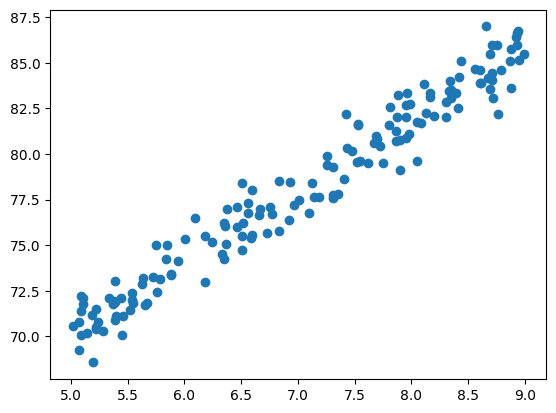

In [ ]:
plt.scatter(X_train, y_train)

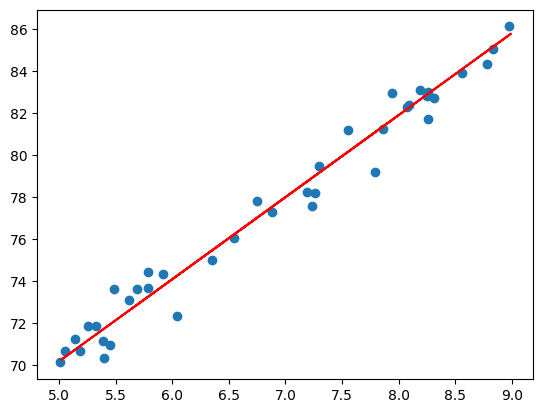

In [ ]:
plt.scatter(X_test, y_test)
plt.plot(X_train, lr.predict(X_train), color="r")

# Present your solution

# Save ML Model

In [ ]:
import joblib
joblib.dump(lr, "student_marks_predictor_model.pkl")

['student_marks_predictor_model.pkl']

In [ ]:
model= joblib.load("student_marks_predictor_model.pkl")

In [ ]:
model.predict(pd.DataFrame([[5]], columns=['study_hours']))

array([[70.16094347]])

# Launch, Monitor and Maintain your system